# Chapter 4 - Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
%matplotlib inline

BASE_DIR = 'https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main'

## 1. Analyze Data
### 1.1. Load *Default* dataset
Dataset Description: https://rdrr.io/cran/ISLR/man/Default.html

In [2]:
df = pd.read_excel(f'{BASE_DIR}/Data/Default.xlsx')
df.head(3)

Unnamed: 0 default student      balance        income
0           1      No      No   729.526495  44361.625074
1           2      No     Yes   817.180407  12106.134700
2           3      No      No  1073.549164  31767.138947

### 1.2. Preprocess Data

In [3]:
# factorize() returns two objects: a label array and an array with the unique values
df['default'], target_names = df['default'].factorize()
df['student'], _ = df['student'].factorize()

print('Target names:', target_names)
df.head(3)

Target names: Index(['No', 'Yes'], dtype='object')


Unnamed: 0  default  student      balance        income
0           1        0        0   729.526495  44361.625074
1           2        0        1   817.180407  12106.134700
2           3        0        0  1073.549164  31767.138947

### 1.3. Plot Data

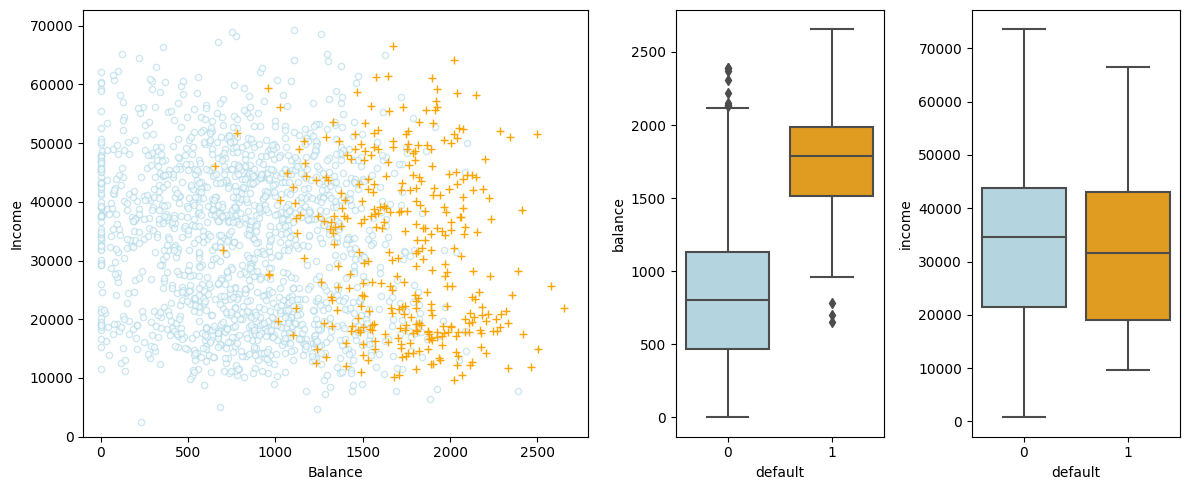

In [4]:
fig = plt.figure(figsize=(12, 5))
gs = GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df['default'] == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df['default'] == 1]

ax1.scatter(df_no['balance'], df_no['income'], s=20, edgecolors='lightblue', facecolors='white', marker='o', linewidths=1, alpha=.6)
ax1.scatter(df_yes['balance'], df_yes['income'], s=40, c='orange', marker='+', linewidths=1)

ax1.set_xlim(xmin=-100)
ax1.set_ylim(ymin=0)
ax1.set_xlabel('Balance')
ax1.set_ylabel('Income')

c_palette = {0:'lightblue', 1:'orange'}
sns.boxplot(df, x='default', y='balance', orient='v', ax=ax2, palette=c_palette)
sns.boxplot(df, x='default', y='income', orient='v', ax=ax3, palette=c_palette)

fig.tight_layout()
fig.show()

### 1.4. Exercise
Write your code in the cells below. (10min)<br/>
Dataset Description: https://rdrr.io/cran/ISLR/man/Smarket.html
1. Load `f'{BASE_DIR}/Data/Smarket.csv'` data with `pd.read_csv()`
2. Factorize 'Direction' Column
3. Plot Data with 'Lag1', 'Lag2' predictors

In [ ]:
# 1. Load f'{BASE_DIR}/Data/Smarket.csv' data with pd.read_csv() method




In [ ]:
# 2. Factorize 'Direction' Column




In [ ]:
# 3. Plot Data with 'Lag1', 'Lag2' predictors for each direction











## 2. Logistic Regression
### 2.1. Predict Default with Balance

In [8]:
# Load and factorize data
df = pd.read_excel(f'{BASE_DIR}/Data/Default.xlsx')
df['default'], target_names = df['default'].factorize()
df['student'], _ = df['student'].factorize()

# Select X, Y
X_train = df[['balance']]
y_train = df['default']

# Train Logistic Regression Model
clf = LogisticRegression(solver='newton-cg')
clf.fit(X_train, y_train)

# Predict Y with trained model
y_pred = clf.predict(X_train)
y_true = y_train

print(y_true, y_pred)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default, Length: 10000, dtype: int64 [0 0 0 ... 0 0 0]


### 2.2. Analyze the Result

In [9]:
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      9667
         Yes       0.70      0.30      0.42       333

    accuracy                           0.97     10000
   macro avg       0.84      0.65      0.70     10000
weighted avg       0.97      0.97      0.97     10000



In [10]:
print(confusion_matrix(y_true, y_pred))

[[9625   42]
 [ 233  100]]


              precision    recall  f1-score   support

          No       0.98      1.00      0.99      9667
         Yes       0.70      0.30      0.42       333

    accuracy                           0.97     10000
   macro avg       0.84      0.65      0.70     10000
weighted avg       0.97      0.97      0.97     10000



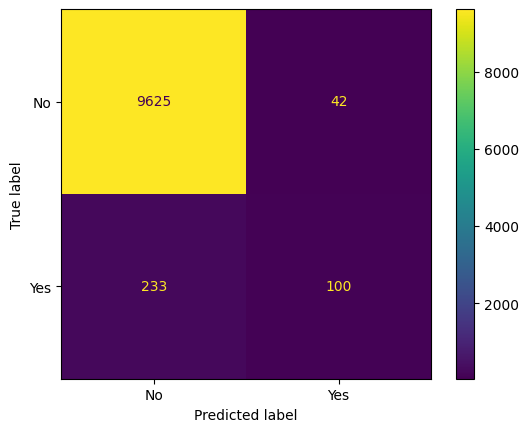

In [11]:
print(classification_report(y_true, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=target_names)

### 2.3. Exercise
Write your code in the cells below. (10min)
1. Load f'{BASE_DIR}/Data/Smarket.csv' data with pd.read_csv() method
2. Factorize 'Direction' Column
3. Predict Up/Down of the Smarket with your own predictors
4. Analyze the Result

In [ ]:
# 1. Load f'{BASE_DIR}/Data/Smarket.csv' data with pd.read_csv() method




In [ ]:
# 2. Factorize 'Direction' Column




In [14]:
# 3. Predict Up/Down of the Smarket with your own predictors








In [ ]:
# 4. Analyze the Result



### 2.4. Train Test Split

              precision    recall  f1-score   support

          No       0.98      0.99      0.99      1933
         Yes       0.68      0.31      0.43        67

    accuracy                           0.97      2000
   macro avg       0.83      0.65      0.71      2000
weighted avg       0.97      0.97      0.97      2000



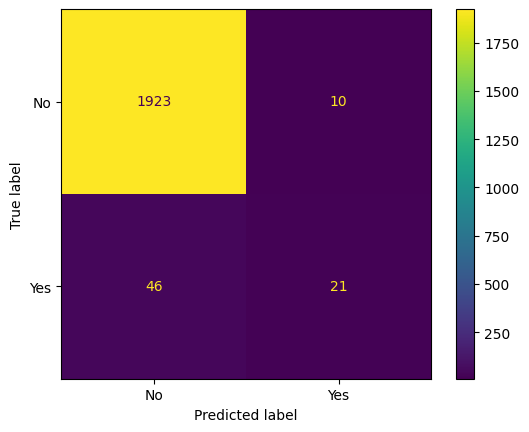

In [16]:
# Load and factorize data
df = pd.read_excel(f'{BASE_DIR}/Data/Default.xlsx')
df['default'], target_names = df['default'].factorize()
df['student'], _ = df['student'].factorize()

# Select X, Y
X = df[['balance']]
y = df['default']

# Train / Test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Train LogisticRegression model with train data
clf = LogisticRegression(solver='newton-cg')
clf.fit(X_train, y_train)

# Predict test data with trained model
y_pred = clf.predict(X_test)
y_true = y_test

# Analyze Result
print(classification_report(y_true, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=target_names)

### 2.5. Predict Probabilty of Default with Balance

In [17]:
X_train = df[['balance']]
y_train = df['default']

clf = LogisticRegression(solver='newton-cg')
clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_train)

print('y_prob shape:', y_prob.shape)
print(y_prob)

y_prob shape: (10000, 2)
[[9.98694312e-01 1.30568789e-03]
 [9.97887393e-01 2.11260696e-03]
 [9.91405225e-01 8.59477452e-03]
 ...
 [9.97533473e-01 2.46652658e-03]
 [8.83240319e-01 1.16759681e-01]
 [9.99928552e-01 7.14482025e-05]]


### 2.6. Plot Balance - Probability Relationship

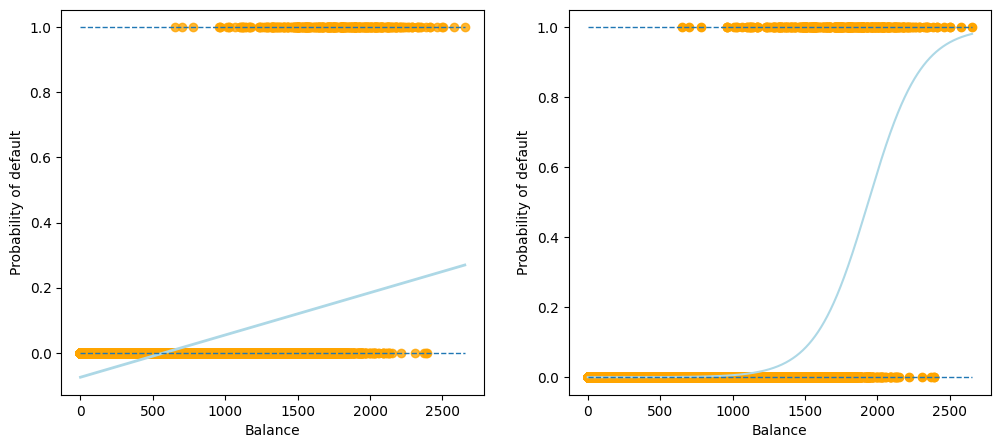

In [18]:
# Create array of test data
X_test = np.arange(df['balance'].min(), df['balance'].max()).reshape(-1,1)

# Calculate the classification probability for every balance values
y_prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Linear Regression (Left Plot)
sns.regplot(x=df['balance'], y=df['default'],
            order=1, ci=None, scatter_kws={'color':'orange'}, line_kws={'color':'lightblue', 'lw':2}, ax=ax1)

# Logistic Regression (Right plot)
ax2.scatter(X_train, y_train, color='orange')
ax2.plot(X_test, y_prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_xlabel('Balance')
    ax.set_ylabel('Probability of default')

### 2.7. Inside of the Library

#### 2.7.1. Scikit Learn

In [19]:
X_train = df[['balance']]
y_train = df['default']

clf = LogisticRegression(solver='newton-cg')
clf.fit(X_train, y_train)

print(clf)
print('classes: ', clf.classes_)
print('coefficients: ', clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.00549891]]
intercept : [-10.6513194]


#### 2.7.2. Statsmodels

In [20]:
X_train = sm.add_constant(df[['balance']])
y_train = df['default']

est = Logit(y_train, X_train).fit()
est.summary2()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: default          Pseudo R-squared: 0.453      
Date:               2023-08-08 14:52 AIC:              1600.4517  
No. Observations:   10000            BIC:              1614.8724  
Df Model:           1                Log-Likelihood:   -798.23    
Df Residuals:       9998             LL-Null:          -1460.3    
Converged:          1.0000           LLR p-value:      6.2329e-290
No. Iterations:     10.0000          Scale:            1.0000     
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
-------------------------------------------------------------------
const       -10.6513    0.3612  -29.4913  0.0000  -11.3592  -9.9435
balance       0.0055    0.0002   24.9524  0.0000    0.0051   0.0059
==================================================================

"""

### 2.8. Exercise
Write your code in the cells below. (5min)
1. Estimate Probability of `default` with `student` predictor
2. Check the inside of the library
3. Repeat 1~2 with Scikit Learn and Statsmodels

Note: Get statistics with Scikit Learn
* https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
* https://datascience.stackexchange.com/questions/15398/how-to-get-p-value-and-confident-interval-in-logisticregression-with-sklearn

In [ ]:
# with Scikit Learn






In [ ]:
# with Statsmodels






###  2.9. Multiple Logistic Regression (Balance, Income, Student - Default)
#### 2.9.1. Scikit Learn

In [23]:
X_train = df[['balance', 'income', 'student']]
y_train = df['default']

clf = LogisticRegression(solver='newton-cg')
clf.fit(X_train, y_train)

print(clf)
print('classes: ', clf.classes_)
print('coefficients: ', clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[ 5.71870282e-03  3.52139581e-06 -6.22103567e-01]]
intercept : [-10.86431303]


#### 2.9.2. Statsmodels

In [24]:
X_train = df[['balance', 'income', 'student']]
y_train = df['default']

est = Logit(y_train, X_train).fit()
est.summary2()

Optimization terminated successfully.
         Current function value: 0.124277
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: default          Pseudo R-squared: 0.149     
Date:               2023-08-08 14:52 AIC:              2491.5306 
No. Observations:   10000            BIC:              2513.1616 
Df Model:           2                Log-Likelihood:   -1242.8   
Df Residuals:       9997             LL-Null:          -1460.3   
Converged:          1.0000           LLR p-value:      3.2740e-95
No. Iterations:     9.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
balance       0.0028    0.0001   22.2911  0.0000   0.0025   0.0030
income       -0.0002    0.0000  -33.6716  0.0000  -0.0002  -0.0002
student      -3.7531    0.1527  -24.5803  0.0000  -4.0524  -3.4539
=================================================================

"""

#### 2.9.3. Exercise
Write your code in the cells below. (5min)
1. Load f'{BASE_DIR}/Data/Smarket.csv' data with pd.read_csv() method
2. Factorize 'Direction' Column
3. Show the relationship between various predictors (Use Statsmodels)

In [ ]:
# 1. Load f'{BASE_DIR}/Data/Smarket.csv' data with pd.read_csv() method




In [ ]:
# 2. Factorize 'Direction' Column




In [ ]:
# 3. Show the relationship between various predictors (Use Statsmodels)






### 2.11. Confounding in the *Default* data

In [28]:
# Load and factorize data
df = pd.read_excel(f'{BASE_DIR}/Data/Default.xlsx')
df['default'], target_names = df['default'].factorize()
df['student'], _ = df['student'].factorize()

# balance and default vectors for students
X_student = df[df['student'] == 1][['balance']]
y_student = df[df['student'] == 1]['default']

# balance and default vectors for non-students
X_not_student = df[df['student'] == 0][['balance']]
y_not_student = df[df['student'] == 0]['default']

# Test data for ploting
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1, 1)

# Train the model and Predict Probabilities
clf_student = LogisticRegression(solver='newton-cg')
clf_student.fit(X_student, y_student)
prob_student = clf_student.predict_proba(X_test)

clf_not_student = LogisticRegression(solver='newton-cg')
clf_not_student.fit(X_not_student, y_not_student)
prob_not_student = clf_not_student.predict_proba(X_test)

In [29]:
df.groupby(['student','default']).size().unstack('default')

default     0    1
student           
0        6850  206
1        2817  127

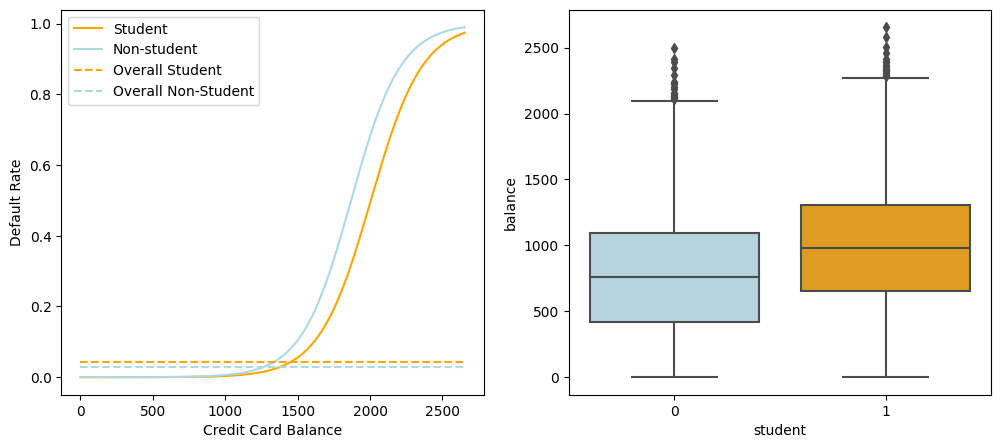

In [30]:
# Creating plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Left plot
ax1.plot(X_test, prob_student[:, 1], color='orange', label='Student')
ax1.plot(X_test, prob_not_student[:, 1], color='lightblue', label='Non-student')

default_prob_student = df[df['default'] == 1][df['student'] == 1].shape[0] / df[df['student'] == 1].shape[0]
default_prob_not_student = df[df['default'] == 1][df['student'] == 0].shape[0] / df[df['student'] == 0].shape[0]
ax1.hlines(default_prob_student,
           xmin=ax1.xaxis.get_data_interval()[0], xmax=ax1.xaxis.get_data_interval()[1],
           colors=['orange'], label='Overall Student', linestyles='dashed')
ax1.hlines(default_prob_not_student,
           xmin=ax1.xaxis.get_data_interval()[0], xmax=ax1.xaxis.get_data_interval()[1],
           colors=['lightblue'], label='Overall Non-Student', linestyles='dashed')
ax1.set_xlabel('Credit Card Balance')
ax1.set_ylabel('Default Rate')
ax1.legend(loc='upper left')

# Right plot
c_palette = {0:'lightblue', 1:'orange'}
sns.boxplot(df, x='student', y='balance', orient='v', ax=ax2,  palette=c_palette);

## 3. Linear Discriminant Analysis
### 3.1. Predict Default with LDA

In [31]:
X = df[['balance', 'income', 'student']]
y = df['default']

lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X, y).predict(X)
y_true = y

df_ = pd.DataFrame({'True default status': y_true,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status         No  Yes
Predicted default status           
No                        9645  254
Yes                         22   79

              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



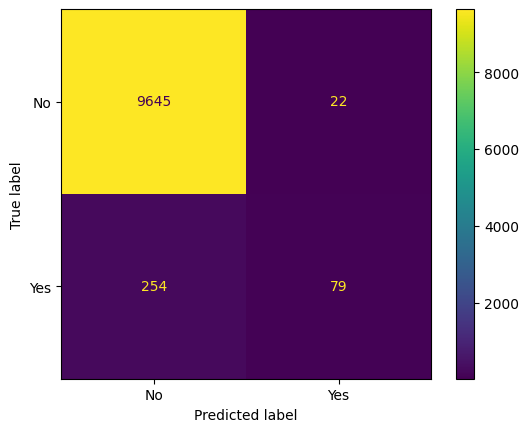

In [32]:
print(classification_report(y_true, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=target_names)

In [33]:
FN_rate = np.sum(np.logical_and(y_pred == 0, y_true == 1)) / np.sum(y_true == 1)
FP_rate = np.sum(np.logical_and(y_pred == 1, y_true == 0)) / np.sum(y_true == 0)
error_rate = np.sum(y_pred != y_true) / y_pred.size

print(f'False Negative Rate: {FN_rate}')
print(f'False Positive Rate: {FP_rate}')
print(f'Error Rate: {error_rate}')

False Negative Rate: 0.7627627627627628
False Positive Rate: 0.0022757835936691837
Error Rate: 0.0276


### 3.2. Predict Default with Different Thresholds
Instead of using the probability of 50% as decision boundary, we say that a probability of default of 20% is to be classified as 'Yes'.

In [34]:
decision_prob = 0.3  # Threshold
y_prob = lda.fit(X, y).predict_proba(X)
y_pred = y_prob[:, 1] > decision_prob
y_true = y

              precision    recall  f1-score   support

          No       0.98      0.99      0.99      9667
         Yes       0.61      0.46      0.52       333

    accuracy                           0.97     10000
   macro avg       0.80      0.72      0.75     10000
weighted avg       0.97      0.97      0.97     10000



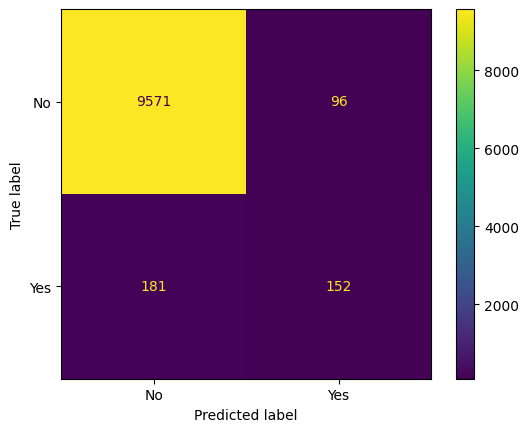

In [35]:
print(classification_report(y_true, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=target_names)

In [36]:
FN_rate = np.sum(np.logical_and(y_pred == 0, y_true == 1)) / np.sum(y_true == 1)
FP_rate = np.sum(np.logical_and(y_pred == 1, y_true == 0)) / np.sum(y_true == 0)
error_rate = np.sum(y_pred != y_true) / y_pred.size

print(f'False Negative Rate: {FN_rate}')
print(f'False Positive Rate: {FP_rate}')
print(f'Error Rate: {error_rate}')

False Negative Rate: 0.5435435435435435
False Positive Rate: 0.009930692045101892
Error Rate: 0.0277


### 3.3. Exercise
Write your code in the cells below. (15min)
1. Calculate the False Negative Rate, False Positive Rate, Error Rate with various thresholds (0 ~ 0.5)
2. Plot a graph with 3 lines (X: Threadhold, y: FN, FP, Error)

In [37]:
# 1. Calculate the False Negative Rate, False Positive Rate, Error Rate with various thresholds (0 ~ 0.5)











In [ ]:
# 2. Plot a graph with 3 lines (X: Threadhold, y: FN, FP, Error)











### 3.4. ROC curve

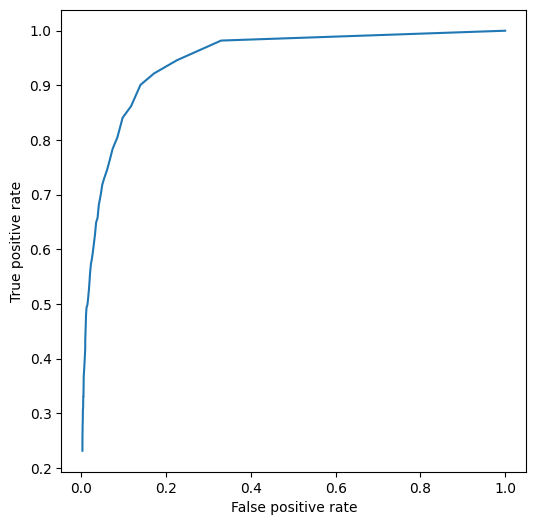

In [39]:
# Draw ROC curve

TP_rates = [1 - FN_rate for FN_rate in FN_rates]

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(FP_rates, TP_rates)
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
fig.show()

#### 3.4.1. ROC curve with Scikit Learn

In [40]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob[:, 1])

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(fpr, tpr)
fig.show()

### 3.5. Area Under the Curve

In [41]:
auc_score = auc(fpr, tpr)
print(auc_score)

0.9495202246831501


In [42]:
auc_score = roc_auc_score(y_true, y_prob[:, 1])
print(auc_score)

0.9495202246831501


### 3.6. Advanced Exercise
Write your code in the cells below. (20min)
Plot ROC curve and AUC with *Hitters* Dataset.<br/>
Dataset Description: https://rdrr.io/cran/ISLR/man/Hitters.html
1. Load data (`f'{BASE_DIR}/Data/Hitters.csv'`)
2. Check Categorical Data
3. Preprocess Data (Drop NaN and Factorize)
4. Create New Label (Split High Salary and Low Salary)
5. Prepare Train data and Test data (Use all usable predictors)
6. Train and estimate the `y_pred`
7. Print classification report and plot confusion matrix
8. Estimate the `y_prob` with trained model
9. Plot ROC curve

#### 3.6.1. Load data (`f'{BASE_DIR}/Data/Hitters.csv'`)

In [43]:
pd.options.display.max_columns = None  # To show all columns
df = pd.read_csv(f'{BASE_DIR}/Data/Hitters.csv')
df.head(3)

Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits   
0  -Andy Allanson    293    66      1    30   29     14      1     293     66  \
1     -Alan Ashby    315    81      7    24   38     39     14    3449    835   
2    -Alvin Davis    479   130     18    66   72     76      3    1624    457   

   CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors   
0       1     30    29      14      A        E      446       33      20  \
1      69    321   414     375      N        W      632       43      10   
2      63    224   266     263      A        W      880       82      14   

   Salary NewLeague  
0     NaN         A  
1   475.0         N  
2   480.0         A

#### 3.6.2. Check Categorical Data

#### 3.6.3. Preprocess Data (Drop NaN and Factorize)

#### 3.6.4. Create Label (Split High Salary and Low Salary)

#### 3.6.5. Prepare Train data and Test data (Use all usable predictors)

#### 3.6.6. Train and estimate the `y_pred`

#### 3.6.7. Print classification report and plot confusion matrix

#### 3.6.8. Estimate the `y_prob` with trained model

#### 3.6.9. Plot ROC curve

### 3.7. Dimensionality Reduction with LDA

<img src="https://gitlab.com/machine-learning-course1/ml-practice-lg-2024-spring/-/raw/main/Images/lda.png" style="width: 75%;"/>

#### 3.7.1. Load *Iris* Dataset

In [52]:
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

print(X.shape, y.shape, target_names)

(150, 4) (150,) ['setosa' 'versicolor' 'virginica']


#### 3.7.2 Dimensionality Reduction

In [53]:
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)

#### 3.7.3. Plot Data

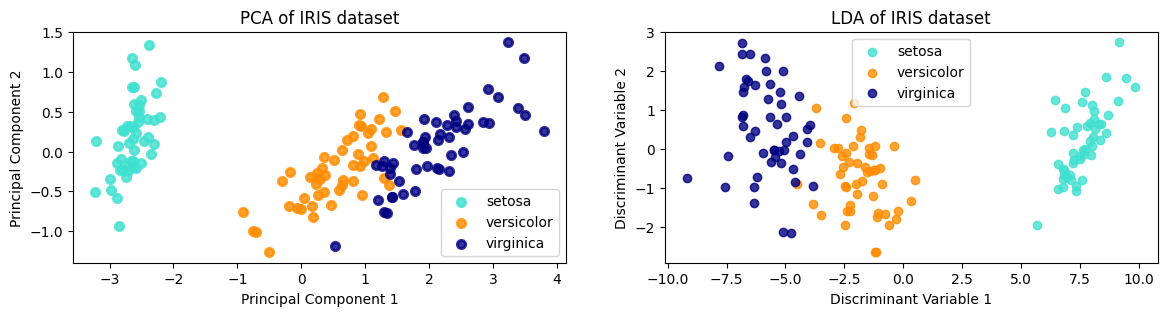

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,3))
colors = ['turquoise', 'darkorange', 'navy']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    PC1 = X_pca[y == i, 0]
    PC2 = X_pca[y == i, 1]
    ax1.scatter(PC1, PC2, color=color, alpha=0.8, lw=lw,
                label=target_name)
ax1.legend(loc='best', shadow=False, scatterpoints=1)
ax1.set_title('PCA of IRIS dataset')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    DV1 = X_lda[y == i, 0]
    DV2 = X_lda[y == i, 1]
    ax2.scatter(DV1, DV2, alpha=0.8, color=color,
                label=target_name)
ax2.legend(loc='best', shadow=False, scatterpoints=1)
ax2.set_title('LDA of IRIS dataset')
ax2.set_xlabel('Discriminant Variable 1')
ax2.set_ylabel('Discriminant Variable 2')

plt.show()

### 3.8. Inside the Library

In [55]:
df = pd.read_csv(f'{BASE_DIR}/Data/Smarket.csv', usecols=range(1, 10), index_col=0, parse_dates=True)
df.head(3)

Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
Year                                                                  
2001-01-01  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
2001-01-01  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2001-01-01  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down

In [56]:
X_train = df[:'2004'][['Lag1','Lag2']]
y_train = df[:'2004']['Direction']

X_test = df['2005':][['Lag1','Lag2']]
y_test = df['2005':]['Direction']

lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X_train, y_train).predict(X_test)

In [57]:
lda.priors_, lda.means_, lda.coef_

(array([0.49198397, 0.50801603]),
 array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([[-0.05544078, -0.0443452 ]]))

In [58]:
print(classification_report(y_test, y_pred, digits=3))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=lda.classes_)

              precision    recall  f1-score   support

        Down      0.500     0.315     0.387       111
          Up      0.582     0.752     0.656       141

    accuracy                          0.560       252
   macro avg      0.541     0.534     0.522       252
weighted avg      0.546     0.560     0.538       252



## 4. Different Classifiers
### 4.1. Quadratic Discriminant Analysis

In [59]:
df = pd.read_csv(f'{BASE_DIR}/Data/Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
df.head(3)

X_train = df[:'2004'][['Lag1', 'Lag2']]
y_train = df[:'2004']['Direction']

X_test = df['2005':][['Lag1', 'Lag2']]
y_test = df['2005':]['Direction']

In [60]:
qda = QuadraticDiscriminantAnalysis()
y_pred = qda.fit(X_train, y_train).predict(X_test)

In [61]:
qda.priors_, qda.means_

(array([0.49198397, 0.50801603]),
 array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]))

              precision    recall  f1-score   support

        Down      0.600     0.270     0.373       111
          Up      0.599     0.858     0.706       141

    accuracy                          0.599       252
   macro avg      0.600     0.564     0.539       252
weighted avg      0.599     0.599     0.559       252



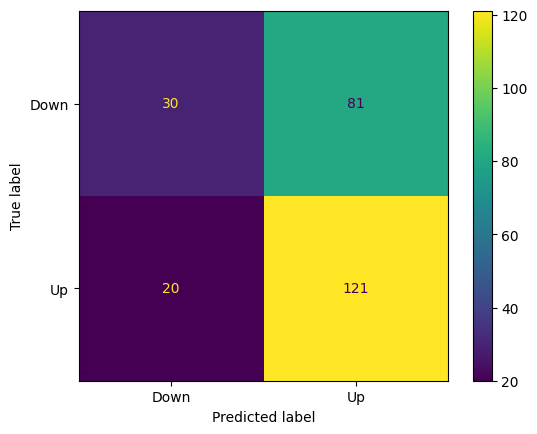

In [62]:
print(classification_report(y_test, y_pred, digits=3))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=qda.classes_)

### 4.2. K-Nearest Neighbors

              precision    recall  f1-score   support

        Down      0.426     0.387     0.406       111
          Up      0.550     0.589     0.568       141

    accuracy                          0.500       252
   macro avg      0.488     0.488     0.487       252
weighted avg      0.495     0.500     0.497       252



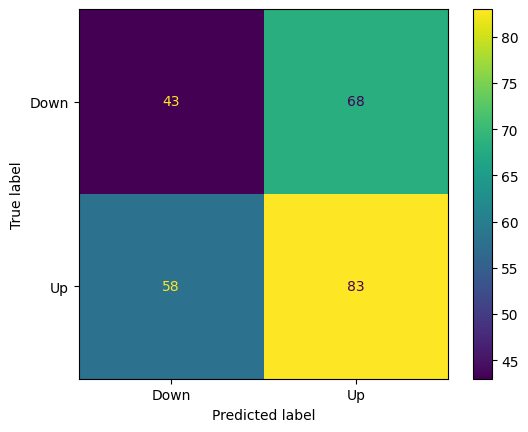

In [63]:
knn = KNeighborsClassifier(n_neighbors=1)
y_pred = knn.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=knn.classes_)

              precision    recall  f1-score   support

        Down      0.466     0.432     0.449       111
          Up      0.577     0.610     0.593       141

    accuracy                          0.532       252
   macro avg      0.522     0.521     0.521       252
weighted avg      0.528     0.532     0.529       252



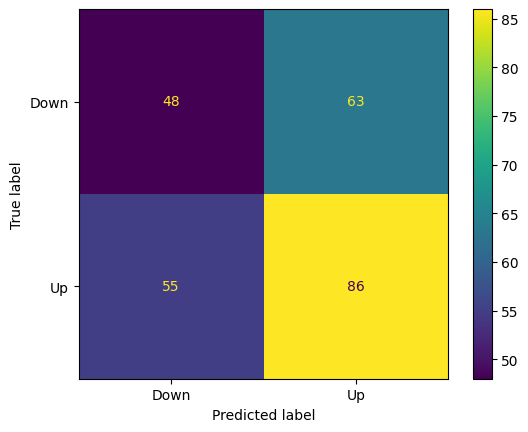

In [64]:
knn = KNeighborsClassifier(n_neighbors=3)
y_pred = knn.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=knn.classes_)

### 4.3. Naive Bayes Classifier

              precision    recall  f1-score   support

        Down       0.59      0.26      0.36       111
          Up       0.60      0.86      0.70       141

    accuracy                           0.60       252
   macro avg       0.59      0.56      0.53       252
weighted avg       0.59      0.60      0.55       252



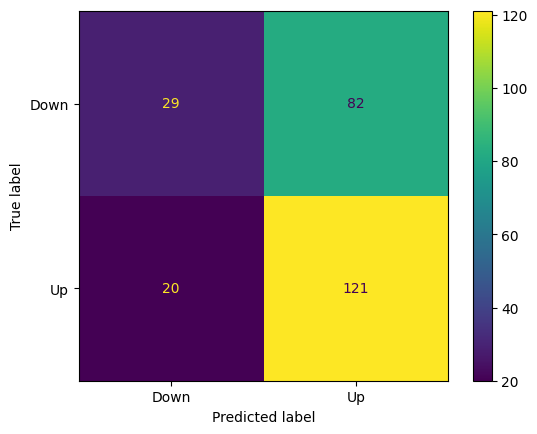

In [65]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clf.classes_)

### 4.4. Exercise
Write your code in the cells below.
- Practice with the Caravan Insurance Dataset
- Data path: `f'{BASE_DIR}/Data/Caravan.csv'`
- Target Feature (y) : `Purchase`

In [66]:
df = pd.read_csv(f'{BASE_DIR}/Data/Caravan.csv')
df.head(3)

Unnamed: 0  MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR   
0           1       33         1        3         2         8       0       5  \
1           2       37         1        2         2         8       1       4   
2           3       37         1        2         2         8       0       4   

   MGODOV  MGODGE  MRELGE  MRELSA  MRELOV  MFALLEEN  MFGEKIND  MFWEKIND   
0       1       3       7       0       2         1         2         6  \
1       1       4       6       2       2         0         4         5   
2       2       4       3       2       4         4         4         2   

   MOPLHOOG  MOPLMIDD  MOPLLAAG  MBERHOOG  MBERZELF  MBERBOER  MBERMIDD   
0         1         2         7         1         0         1         2  \
1         0         5         4         0         0         0         5   
2         0         5         4         0         0         0         7   

   MBERARBG  MBERARBO  MSKA  MSKB1  MSKB2  MSKC  MSKD  MHHUUR  MHKOOP  MAUT1   
0         5         2     1      1      2     6     1       1       8      8  \
1         0         4     0      2      3     5     0       2       7      7   
2         0         2     0      5      0     4     0       7       2      7   

   MAUT2  MAUT0  MZFONDS  MZPART  MINKM30  MINK3045  MINK4575  MINK7512   
0      0      1        8       1        0         4         5         0  \
1      1      2        6       3        2         0         5         2   
2      0      2        9       0        4         5         0         0   

   MINK123M  MINKGEM  MKOOPKLA  PWAPART  PWABEDR  PWALAND  PPERSAUT  PBESAUT   
0         0        4         3        0        0        0         6        0  \
1         0        5         4        2        0        0         0        0   
2         0        3         4        2        0        0         6        0   

   PMOTSCO  PVRAAUT  PAANHANG  PTRACTOR  PWERKT  PBROM  PLEVEN  PPERSONG   
0        0        0         0         0       0      0       0         0  \
1        0        0         0         0       0      0       0         0   
2        0        0         0         0       0      0       0         0   

   PGEZONG  PWAOREG  PBRAND  PZEILPL  PPLEZIER  PFIETS  PINBOED  PBYSTAND   
0        0        0       5        0         0       0        0         0  \
1        0        0       2        0         0       0        0         0   
2        0        0       2        0         0       0        0         0   

   AWAPART  AWABEDR  AWALAND  APERSAUT  ABESAUT  AMOTSCO  AVRAAUT  AAANHANG   
0        0        0        0         1        0        0        0         0  \
1        2        0        0         0        0        0        0         0   
2        1        0        0         1        0        0        0         0   

   ATRACTOR  AWERKT  ABROM  ALEVEN  APERSONG  AGEZONG  AWAOREG  ABRAND   
0         0       0      0       0         0        0        0       1  \
1         0       0      0       0         0        0        0       1   
2         0       0      0       0         0        0        0       1   

   AZEILPL  APLEZIER  AFIETS  AINBOED  ABYSTAND Purchase  
0        0         0       0        0         0       No  
1        0         0       0        0         0       No  
2        0         0       0        0         0       No

In [ ]:
## Write Your code







